## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print(os.listdir('../input'))

['Ireland-crime1.csv']


In [2]:
Ireland_crime1 = pd.read_csv("../input/Ireland-crime1.csv")
Ireland_crime1.head(20)

,id,Station,Divisions,Year,Number.of.Crime.Record
0,20675.0,Cavan,Cavan/Monaghan Division,2007,7127
1,NaN,NaN,Cavan/Monaghan Division,2008,6686
2,NaN,NaN,Cavan/Monaghan Division,2009,6083
3,NaN,NaN,Cavan/Monaghan Division,2010,6081
4,NaN,NaN,Cavan/Monaghan Division,2011,5752
5,NaN,NaN,Cavan/Monaghan Division,2012,5210
6,NaN,NaN,Cavan/Monaghan Division,2013,4302
7,NaN,NaN,Cavan/Monaghan Division,2014,4282
8,NaN,NaN,Cavan/Monaghan Division,2015,4479
9,NaN,NaN,Cavan/Monaghan Division,2016,1108


In [3]:
Ireland_crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
id                        21 non-null float64
Station                   21 non-null object
Divisions                 252 non-null object
Year                      252 non-null int64
Number.of.Crime.Record    252 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


In [4]:
Ireland_crime1.isnull().sum()

id                        231
Station                   231
Divisions                   0
Year                        0
Number.of.Crime.Record      0
dtype: int64

In [5]:
Ireland_crime1.head(20)

,id,Station,Divisions,Year,Number.of.Crime.Record
0,20675.0,Cavan,Cavan/Monaghan Division,2007,7127
1,NaN,NaN,Cavan/Monaghan Division,2008,6686
2,NaN,NaN,Cavan/Monaghan Division,2009,6083
3,NaN,NaN,Cavan/Monaghan Division,2010,6081
4,NaN,NaN,Cavan/Monaghan Division,2011,5752
5,NaN,NaN,Cavan/Monaghan Division,2012,5210
6,NaN,NaN,Cavan/Monaghan Division,2013,4302
7,NaN,NaN,Cavan/Monaghan Division,2014,4282
8,NaN,NaN,Cavan/Monaghan Division,2015,4479
9,NaN,NaN,Cavan/Monaghan Division,2016,1108


In [6]:
Ireland_crime1 = Ireland_crime1.drop("id",axis = 1)

In [7]:
Ireland_crime1.head(30)

,Station,Divisions,Year,Number.of.Crime.Record
0,Cavan,Cavan/Monaghan Division,2007,7127
1,NaN,Cavan/Monaghan Division,2008,6686
2,NaN,Cavan/Monaghan Division,2009,6083
3,NaN,Cavan/Monaghan Division,2010,6081
4,NaN,Cavan/Monaghan Division,2011,5752
5,NaN,Cavan/Monaghan Division,2012,5210
6,NaN,Cavan/Monaghan Division,2013,4302
7,NaN,Cavan/Monaghan Division,2014,4282
8,NaN,Cavan/Monaghan Division,2015,4479
9,NaN,Cavan/Monaghan Division,2016,1108


In [8]:
Ireland_crime1.shape

(252, 4)

In [9]:
def standard_plot(title=None, x=None, y=None):
    
    fig, ax = plt.subplots(figsize=(20,4), dpi=80)
    
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(14)
   
    if title != None:
        ax.set_title(title)
        ax.title.set_fontsize(15)
        
    if x != None:
        ax.set_xlabel(x)
        
    if y != None:
        ax.set_ylabel(y)
          
    return fig, ax

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


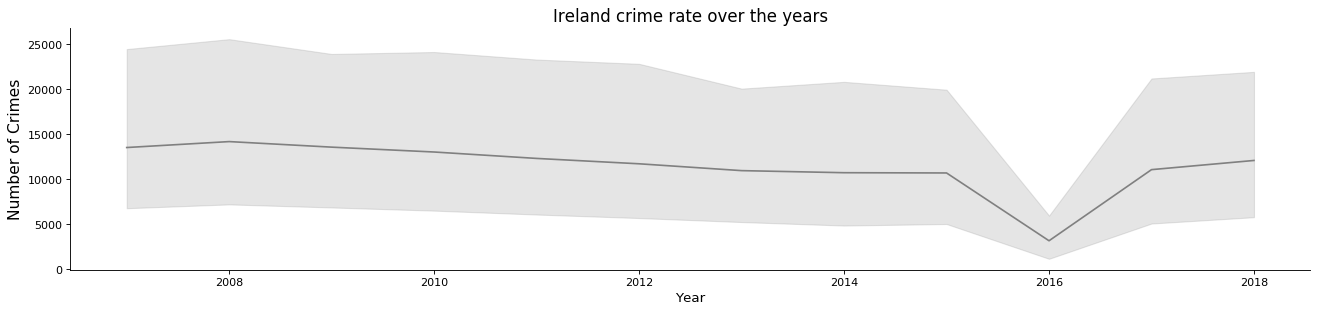

In [10]:
fig, ax = standard_plot('Ireland crime rate over the years')
sns.lineplot(data=Ireland_crime1, x='Year', y='Number.of.Crime.Record', color='gray', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes');

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


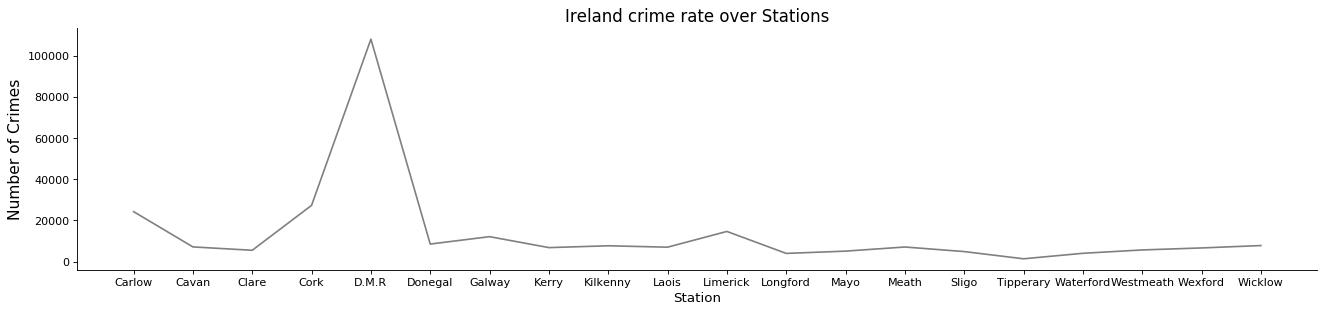

In [11]:
fig, ax = standard_plot('Ireland crime rate over Stations')
sns.lineplot(data=Ireland_crime1, x='Station', y='Number.of.Crime.Record', color='gray', ax=ax)
ax.set_xlabel('Station')
ax.set_ylabel('Number of Crimes');